Изначально загрузим данные. В данной млучае данные представляют из себя выборку сообщений от сообществ Вконтакте, которые принадлежат 12 разным категориям, относящимся к спорту. Задача состоит в классификации текста и определения категории спорта.
Всего в тренировочной выборке 38740 сообщений.

In [ ]:
import pandas as pd 

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



In [ ]:
# Сбрасываем ограничения на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Сбрасываем ограничения на число столбцов
pd.set_option('display.max_columns', None)
# Сбрасываем ограничения на количество символов в записи
pd.set_option('display.max_colwidth', None)

Ниже представлен пример данных.

In [ ]:
train_data.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедведева Evgentokenoid
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупости и жадности зашкаливает 33 В этот раз мы посетим Ростовскую область. Всю. И знаете это пока что единственный выпуск в котором не будет. . . А впрочем сами все увидите 33 Ссылка на видео в источнике
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гашек и Петр Танкист Чех. Примечательно что в детстве Чех мечтал стать хоккеистом а его кумиром был никто иной как Доминик Гашек. Однако стать звездой НХЛ Чеху было не суждено. Петр родился в небогатой семье денег едва хватало на базовые расходы а хоккейная экипировка оказалась не по карману его родителям. А вот футбольные принадлежности родители могли купить без проблем поэтому Петр и выбрал данный вид спорта. Чех хоть и был очень огорчен но решил что однажды обязательно будет играть в хоккей. И его мечта сбылась. Уже после завершения футбольной карьеры он подписал контракт с английской командой Гилфорд Феникс выступающей во втором дивизионе лиги NIHL.
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкормить не сильно свежими слухами а именно составом новой коробки грядущего обновления Имперской Гвардии. Слух практически идентичен августовский информации с реддита Astra Mtokenoid Comtokenoid Patrol Catokenoid shotokenoid troops х2 Ftokenoid ortokenoid tokenoid Armotokenoid senttokenoid Catokenoid tokenoid sqtokenoid The tokenoid sqtokenoid tokenoid now the hq. You tokenoid 39 t get tokenoid tokenoid tokenoid Ftokenoid Ortokenoid tokenoid Three tokenoid gtokenoid or rotokenoid to a sqtokenoid Bomtokenoid ftokenoid gtokenoid Heavy tokenoid Matokenoid rotokenoid tokenoid С той лишь разницей что там указывалось что это Комбат Патруль а Валрак утверждает что это Арми Сет т. е. с кодексами карточками кубами и т. д. По времени предварительный релиз коробки будет в ноябре но основной релиз самой гвардии по отдельным коробкам будет в январе ну то есть по стандартной схеме. Также осенью в районе ноября должен будет выйти и Киллтим Касркины против Некронов. И опять же эта информация также не нова и считывается с подставок касркинов и их высокой кастомизации характерной для киллтимов. Ну и добавляется что в релизах гвардии помимо Атилланских всадников будет и Хакушник Лорд Солар но не Махариус вероятно дефолтная должность но может быть и новый именной. Вместе с тем вся эта информация намекает на то что основной релиз Мирожоров скорее всего перекатывается на 2023 й. Такие дела.
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточной конференции 33 Американцы в Twtokenoid Игорь – хоккейное божество 33 Нью Йорк Рейнджерс одержали сенсационную победу в семиматчевой серии с Каролиной взяв верх над Харрикейнз в решающем противостоянии 6 2. Первой звездой встречи был признан российский голкипер синерубашечников Игорь Шестеркин отразивший 37 из 39 бросков и не упустивший шанса потроллить одного из болельщиков хозяев по завершении поединка. Очередная блестящая игра Шестеркина привела в восторг заокеанских пользователей Twtokenoid. tokentokenoid – У Каролины много что пошло не так в этой серии но в первую очередь стоит отметить вклад в общую победу Рейнджерс который сделал Игорь Шестеркин. Он – важнейшая причина того почему у Кейнз не получалось действовать так результативно. tokentokenoid – У Шестеркина первый полноценный сезон в качестве основного вратаря Рейнджерс – и он уже выводит команду в финал конференции. Как же нам с ним повезло 33 tokentokenoid – Несмотря на то что все победы Рейнджерс в этой серии были разгромными именно Шестеркин являлся их фундаментом. Остановил почти все что летело в его ворота. tokentokenoid – Наблюдение за Игорем Шестеркиным – это самый настоящий религиозный опыт. tokentokenoid – Шестеркин лучше трех вратарей Каролины вместе взятых. Все даже близко не стоят к нему по уровню а единственной причиной по которой Андерсен показывал такую статистику в регуля

Напишем функцию для очистки текста, для это воспользуемся регулярными выражениями.

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+–]'
    text = re.sub(regular, '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'tokenoid', '', text)
    text = re.sub(r'[0-9]','', text)
    text = re.sub(r'⭐️', '', text)
    return text

Присоединим очищенный текст к датасету. 

In [ ]:
cleaned_text = []
for text in train_data['text']:
    cleaned_text.append(clean_text(text))

train_data['text'] = cleaned_text


In [ ]:
train_data['text'].sample()

18952    бой джона джонса со стипе миочичем на ufc  отменен матч развалился еще до официального анонса по вине ufc миочич может повесить перчатки на гвоздь
Name: text, dtype: object

Далее проведем токенизацию полученного очищенного текста и аналогично добавим столбец с токенами к данным.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

tokens = []

for text in train_data['text']:
    tokens.append(word_tokenize(text))

train_data['tokens'] = tokens


In [ ]:
train_data.sample()

,oid,category,text,tokens
23750,813595499,autosport,ландо норрис в mer расселл стал серьезнее ландо норрис считает что его соотечественник джордж расселл изменился после перехода в mer по мнению гонщика m расселл стал гораздо серьезнее и отчасти это связано с атмосферой в командой ландо норрис любой кто поближе знакомится с карьерой джорджа сразу оказывается под впечатлением но то как он проявил себя в ведущей команде mer против льюиса хэмилтона и под большим прессингом просто грандиозно джордж необычайно стабилен переход в ведущую команду никогда не дается легко если вы пилотируете машину у которой проблемы со скоростью то пилотируете гораздо раскованнее поскольку цена ошибки невелика совсем другое дело в ведущей команде другая обстановка может изменить гонщика постоянное внимание к тебе не может не сказаться когда вы боретесь за первые позиции то гораздо серьезнее относитесь к работе джордж всегда был серьезен но в mer эти его качества проявляются особенно явно он приспособился к обстановке в команде после моего дебютного сезона в формуле я обратил внимание что меня неправильно воспринимают я пришел к выводу что должен стать более прямолинейным более целеустремленным меньше дурачиться я сознательно принял такое решение,"[ландо, норрис, в, mer, расселл, стал, серьезнее, ландо, норрис, считает, что, его, соотечественник, джордж, расселл, изменился, после, перехода, в, mer, по, мнению, гонщика, m, расселл, стал, гораздо, серьезнее, и, отчасти, это, связано, с, атмосферой, в, командой, ландо, норрис, любой, кто, поближе, знакомится, с, карьерой, джорджа, сразу, оказывается, под, впечатлением, но, то, как, он, проявил, себя, в, ведущей, команде, mer, против, льюиса, хэмилтона, и, под, большим, прессингом, просто, грандиозно, джордж, необычайно, стабилен, переход, в, ведущую, команду, никогда, не, дается, легко, если, вы, пилотируете, машину, у, которой, проблемы, со, скоростью, то, пилотируете, гораздо, раскованнее, поскольку, цена, ошибки, невелика, совсем, другое, дело, в, ...]"


Так как в языке часто встречаются слова, которые важны только с точки зрения грамматики либо являются связующими, их необходимо убрать. Для этого загрузим список стоп слов и очистим токены от данных слов.

In [ ]:
from nltk.corpus import stopwords

russian_stopwords = stopwords.words("russian")
stopwords_cleaned = []

for text in train_data['tokens']:
    text = [word for word in text if word not in russian_stopwords]
    stopwords_cleaned.append(text)

train_data['stopwords_cleaned'] = stopwords_cleaned

Аналогично добавим очищенные данные к данным.

In [ ]:
train_data.sample()

,oid,category,text,tokens,stopwords_cleaned
33732,939179742,autosport,постеры к предстоящему на этой неделе гран при азербайджана,"[постеры, к, предстоящему, на, этой, неделе, гран, при, азербайджана]","[постеры, предстоящему, неделе, гран, азербайджана]"


Далее приведем слова к номральной форме, для этого проведем лематизацию токенов и также добавим в датасет.

In [ ]:
from pymorphy2 import MorphAnalyzer

lemmas = []
morph = MorphAnalyzer()

for text in train_data['stopwords_cleaned']:
    text = [morph.normal_forms(word)[0] for word in text]
    lemmas.append(text)

train_data['Lemmas_msg'] = lemmas

In [ ]:
train_data.sample()

,oid,category,text,tokens,stopwords_cleaned,Lemmas_msg
29369,295681888,motosport,продам zongshen кубов моточясов сломан вторичный вал слетела цепь сломало вторичный вал точнее кончик разобран можно посмотреть состояние цена ремонта к что бы привести в идеал отдам n состояние воздушный фильтр всю электрику свечи кому интересно могу скинуть фото находиться в кудиново могу привести в приделах балашихи торг обмен,"[продам, zongshen, кубов, моточясов, сломан, вторичный, вал, слетела, цепь, сломало, вторичный, вал, точнее, кончик, разобран, можно, посмотреть, состояние, цена, ремонта, к, что, бы, привести, в, идеал, отдам, n, состояние, воздушный, фильтр, всю, электрику, свечи, кому, интересно, могу, скинуть, фото, находиться, в, кудиново, могу, привести, в, приделах, балашихи, торг, обмен]","[продам, zongshen, кубов, моточясов, сломан, вторичный, вал, слетела, цепь, сломало, вторичный, вал, точнее, кончик, разобран, посмотреть, состояние, цена, ремонта, привести, идеал, отдам, n, состояние, воздушный, фильтр, электрику, свечи, кому, интересно, могу, скинуть, фото, находиться, кудиново, могу, привести, приделах, балашихи, торг, обмен]","[продать, zongshen, куб, моточяс, сломать, вторичный, вал, слететь, цепь, сломать, вторичный, вал, точнее, кончик, разобрать, посмотреть, состояние, цена, ремонт, привести, идеал, отдать, n, состояние, воздушный, фильтр, электрик, свеча, кто, интересно, мочь, скинуть, фото, находиться, кудиново, мочь, привести, придел, балашиха, торг, обмен]"


На данном этапе процесс предобработки текста закончен и с данными данными можно работать.

In [ ]:
train_data['Lemmas_msg_joined'] = train_data['Lemmas_msg'].apply(' '.join)

Создадим словарь со словами, для этого создадим множество и получаем следующую информацию о данных:

In [ ]:
all_words = [word for tokens in train_data["Lemmas_msg"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in train_data["Lemmas_msg"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))


1561820 words total, with a vocabulary size of 70568
Max sentence length is 359


Изначально рассмотрим модель мешка слов, суть данного метода заключается в пересчете слов в предложения вне зависимости от структуры и грамматики, сохраняя лишь частоту встречаемости данного слова в тексте, то есть создает мультимножество.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer
list_corpus = train_data['Lemmas_msg_joined'].tolist()
list_labels = train_data['category'].astype('category').cat.codes.tolist()
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size = 0.2, random_state=40)
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)
y_predicted_counts = clf.predict(X_test_counts)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
    average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
    average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1
    
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.831, precision = 0.833, recall = 0.831, f1 = 0.832


В целом метрики получились достаточно неплохие, так точность составила 83,1%, что неплохо для такого простого метода. 

Далее попробуем применить метод TF-IDF. В целом TF-IDF это статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

In [ ]:
def tfidf(data):
 tfidf_vectorizer = TfidfVectorizer()
 train = tfidf_vectorizer.fit_transform(data)
 return train, tfidf_vectorizer
X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)
y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [ ]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf))

accuracy = 0.865, precision = 0.867, recall = 0.865, f1 = 0.866


За счет применения данного метода получилось добиться улучшения в результатах, так точность составила 86,5% то ессть прирост 3,4% по сравнению с мешком слов. 

Далее можно посмотреть наиболее значимые и незначимые слова в рамках данного корпуса слов.

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
 index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
 # loop for each class
 classes ={}
 for class_index in range(model.coef_.shape[0]):
    word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
    sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
    tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
    bottom = sorted_coeff[-n:]
    classes[class_index] = {
                            'tops':tops,
                            'bottom':bottom
 }
 return classes


In [ ]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)
importance_tfidf


{0: {'tops': [(7.4785181708472726, 'wh'),
   (7.784179264596429, 'бегун'),
   (7.8186245648621355, 'спорт'),
   (7.963245326179011, 'бежать'),
   (8.704649185081015, 'атлет'),
   (8.78189055451397, 'дистанция'),
   (9.172124225925181, 'зож'),
   (9.719318865942517, 'атлетика'),
   (12.445695873865642, 'забег'),
   (16.932834993599243, 'бег')],
  'bottom': [(-3.093675240126817, 'миллион'),
   (-3.1560420065664094, 'турнир'),
   (-3.252674054022977, 'рассказывать'),
   (-3.255365299464697, 'сборная'),
   (-3.5921786697881224, 'игрок'),
   (-4.173950212322869, 'играть'),
   (-4.672035383043866, 'служить'),
   (-4.900787245371316, 'команда'),
   (-5.23195201325806, 'игра'),
   (-5.993444168508389, 'матч')]},
 1: {'tops': [(8.409058811421644, 'form'),
   (8.814361821019979, 'шарль'),
   (9.074070197051848, 'пилот'),
   (10.001387175523284, 'гран'),
   (10.338533781673364, 'автоспорт'),
   (11.044623039329387, 'nascar'),
   (11.495036186506871, 'гонка'),
   (11.831120372119619, 'дрифт'),
   

Так очевидно в большинстве категорией в незначимые слова попали "матч", разнообразные слова связки и тому подобное, а высокозначимые слова специфические, такие как бегун/фигурист/волейболист и так далее, то есть слова семантика которых однозначно определяет спорт.

Далее загрузим русский векторизатор слова Navec который дает векторное представление для русских слов. Будем проводить обучение на основании векторного представления слов по модели логистической регресии.

In [ ]:
from navec import Navec
import numpy as np

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)


In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged
def get_word2vec_embeddings(vectors, train_data, generate_missing=False):
    embeddings = train_data['Lemmas_msg'].apply(lambda x: get_average_word2vec(x, vectors,
    generate_missing=generate_missing))
    return list(embeddings)


In [ ]:
embeddings = get_word2vec_embeddings(navec, train_data)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, test_size=0.2,
random_state=40)


In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [ ]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec))

accuracy = 0.649, precision = 0.650, recall = 0.649, f1 = 0.649


Данный метод дал сильное снижение по всем метрикам по сравнению с предыдущими методами. Данный результат может быть связан как с использованием неподходящей модели для обучения, так и со сложность русского языка в контексте векторизации.

Далее попробуем применить рекурентные нейронные сети.

In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, pad_sequences

from keras.models import Model
from keras.models import Sequential

from keras.layers import Embedding, LSTM, Bidirectional

from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply

from keras.optimizers import RMSprop, Adam

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
Y = train_data['category'].astype('category').cat.codes
X = train_data['Lemmas_msg_joined']

In [ ]:
print(Y.shape)
print(X.shape)

(38740,)
(38740,)


Проведем кодификацию лэйблов. И разделим выбору на тестовую и тренировочную.

In [ ]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)
Y.shape

(38740, 13)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

Ограничим 10000 самыми встречаемыми словами, а так же после 300 слова будем отсекать комментарии.

In [ ]:
max_words = 10000
max_len = 300


Обучаем токенизатор, который разобьет на токены наше предложение, а затем приведем к форме последовательности цифр

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = pad_sequences(X_train_seq, maxlen=max_len)

In [ ]:
X_train_seq.shape

(32929, 300)

Создадим архитектуру нейронной сети, которая содержит слои: 
1. Embedding - создает плотные векторы
2. LSTM - слой для обучения долгосрочным зависимостям
3. Dropout - слой прореживания для избежеания переобучения

Так как у нас многоклассовая классификация, то функция активации у нас Soft-max, а функции потерь categorial-crossentropy

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 300, input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(13))
model.add(Activation('softmax'))

In [ ]:
loss = 'categorical_crossentropy'
metrics = ['accuracy']
learning_rate = 0.01
optimizer = Adam(learning_rate)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          3000000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 13)                845       
                                                                 
 activation_1 (Activation)   (None, 13)                0         
                                                                 
Total params: 3,094,285
Trainable params: 3,094,285
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
verbose = 1
epochs = 20
batch_size = 150
validation_split = 0.2

In [ ]:
history = model.fit(
 X_train_seq,
 Y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=verbose,
 validation_split=validation_split
 )

Epoch 1/20
176/176 [==============================] - 110s 612ms/step - loss: 1.0721 - accuracy: 0.6876 - val_loss: 0.6275 - val_accuracy: 0.8243
Epoch 2/20
176/176 [==============================] - 114s 647ms/step - loss: 0.5002 - accuracy: 0.8610 - val_loss: 0.7205 - val_accuracy: 0.8040
Epoch 3/20
176/176 [==============================] - 111s 629ms/step - loss: 0.3887 - accuracy: 0.8909 - val_loss: 0.6287 - val_accuracy: 0.8277
Epoch 4/20
176/176 [==============================] - 111s 634ms/step - loss: 0.2981 - accuracy: 0.9127 - val_loss: 0.6547 - val_accuracy: 0.8339
Epoch 5/20
176/176 [==============================] - 113s 640ms/step - loss: 0.2518 - accuracy: 0.9269 - val_loss: 0.7063 - val_accuracy: 0.8286
Epoch 6/20
176/176 [==============================] - 116s 657ms/step - loss: 0.2424 - accuracy: 0.9280 - val_loss: 0.7277 - val_accuracy: 0.8274
Epoch 7/20
176/176 [==============================] - 117s 662ms/step - loss: 0.2488 - accuracy: 0.9256 - val_loss: 0.7549 -

In [ ]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

In [ ]:
epochs=range(1, len(history_dict['accuracy'])+1)

<function matplotlib.pyplot.show(close=None, block=None)>

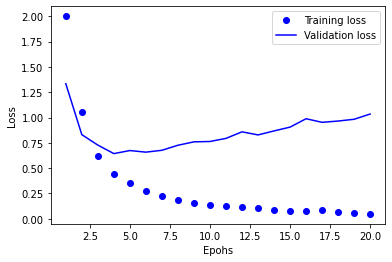

In [ ]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.legend()
plt.show


In [ ]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']

<function matplotlib.pyplot.show(close=None, block=None)>

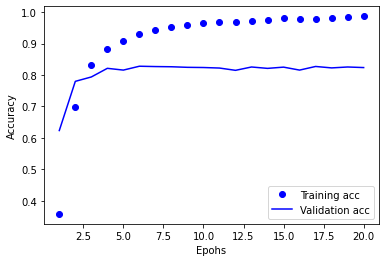

In [ ]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epohs')
plt.ylabel('Accuracy')
plt.legend()
plt.show


Как мы видим по результатам работы рекурентной нейроной сети, сеть в среднем дает accuracy в районе 82% и при этом очень быстро выходит на плато в районе данных цифр.

Выводы:

По итогам выполнения данной лабораторной работы были получения основные знания по естественной обработке языка и были применены на практике.

Конкретнно в данном датасете наилучший результат показал метод TF-IDF, это можно обьяснить тем, что классификация происходила в рамках узкой тематики, и в комментариях всегда были какие-то ключевые слова, которые часто встречаются конкретнно в данном виде спорта.Результаты немногим хуже показали рекурентные нейронные сети и мешок слов. Мешок слов немного напоминает по своей сути TF-IDF, а рекурентные нейронные сети за счет слоя LSTM смогли выявить определенные паттерны в комментариях. 

Наихудший результат был показан при применении метода векторизации слов, скорее всего это было связано с наличием не только русского языка, но и других слов, а также с проблемами векторизации русского языка на данный момент. 